In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable



In [27]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,4)
        self.hidden_layer1  = nn.Linear(4,4)
        self.output_layer   = nn.Linear(4,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [28]:

def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output_train = model(X_train)
        loss_train = criterion(output_train, y_train)
        loss_train.backward()
        optimizer.step()
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)
        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [66]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=2)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

input_dim  = 4 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0736, Test Loss: 0.0387
Epoch 100/1000, Train Loss: 0.0510, Test Loss: 0.0110
Epoch 150/1000, Train Loss: 0.0484, Test Loss: 0.0078
Epoch 200/1000, Train Loss: 0.0472, Test Loss: 0.0063
Epoch 250/1000, Train Loss: 0.0465, Test Loss: 0.0055
Epoch 300/1000, Train Loss: 0.0461, Test Loss: 0.0049
Epoch 350/1000, Train Loss: 0.0457, Test Loss: 0.0045
Epoch 400/1000, Train Loss: 0.0455, Test Loss: 0.0043
Epoch 450/1000, Train Loss: 0.0453, Test Loss: 0.0041
Epoch 500/1000, Train Loss: 0.0452, Test Loss: 0.0040
Epoch 550/1000, Train Loss: 0.0450, Test Loss: 0.0040
Epoch 600/1000, Train Loss: 0.0449, Test Loss: 0.0039
Epoch 650/1000, Train Loss: 0.0448, Test Loss: 0.0038
Epoch 700/1000, Train Loss: 0.0448, Test Loss: 0.0038
Epoch 750/1000, Train Loss: 0.0447, Test Loss: 0.0037
Epoch 800/1000, Train Loss: 0.0446, Test Loss: 0.0037
Epoch 850/1000, Train Loss: 0.0446, Test Loss: 0.0036
Epoch 900/1000, Train Loss: 0.0446, Test Loss: 0.0036
Epoch 950/1000, Train Loss: 0

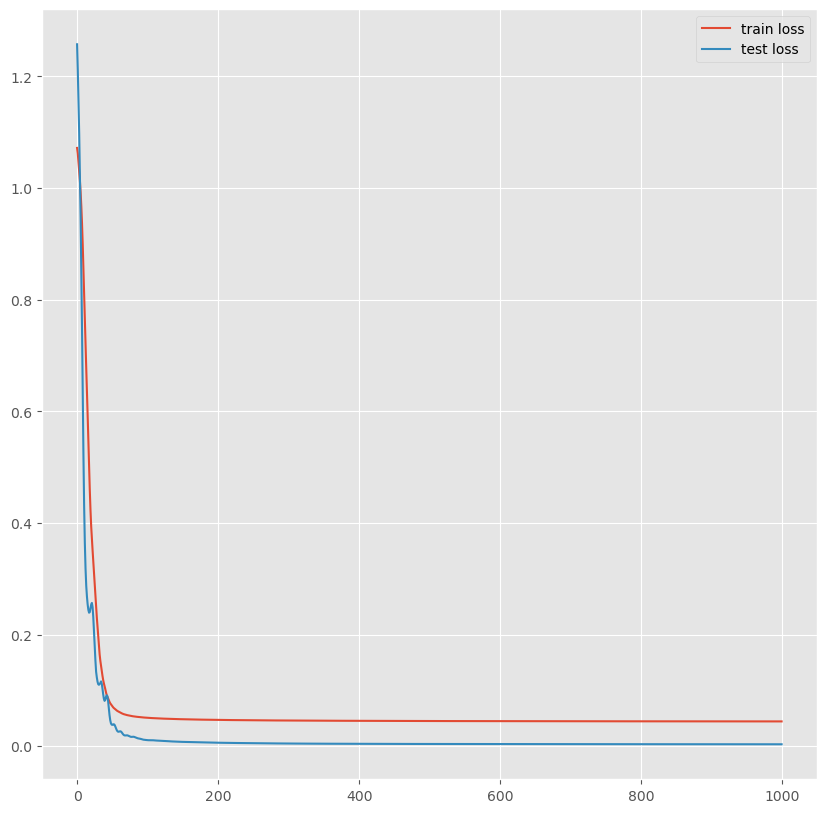

In [67]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [68]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 98.519
Test Accuracy: 100.0
